<a href="https://colab.research.google.com/github/AkshadPawar/Data-Analytics-Intership-Oasis-Infobyte-/blob/main/Projects/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
# Load Dataset
file_path = '/content/drive/MyDrive/data Analist intership/ifood_df (1).csv'
data = pd.read_csv(file_path)

In [18]:
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,TotalPurchases,Cluster,PCA1,PCA2
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,25,3,3.391282,0.202971
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,6,2,-1.857815,-0.396088
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,21,1,1.439324,-0.864491
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,8,2,-2.155302,-0.810469
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,19,1,0.196236,1.492717


In [19]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'TotalPurchases', 'Cluster', 'PCA1', 'PCA2'],
      dtype='object')

In [20]:
data.isna().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [22]:
data.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [3]:
# Step 1: Data Cleaning
# Checking for missing values
if data.isnull().sum().sum() > 0:
    data.fillna(data.median(), inplace=True)

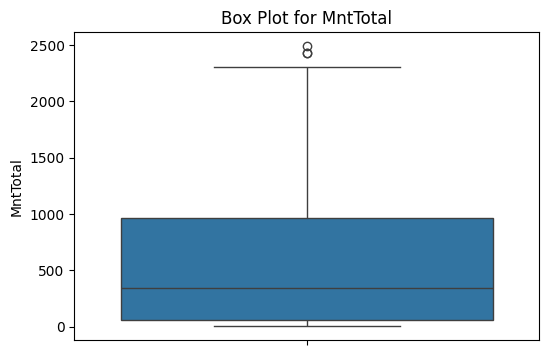

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

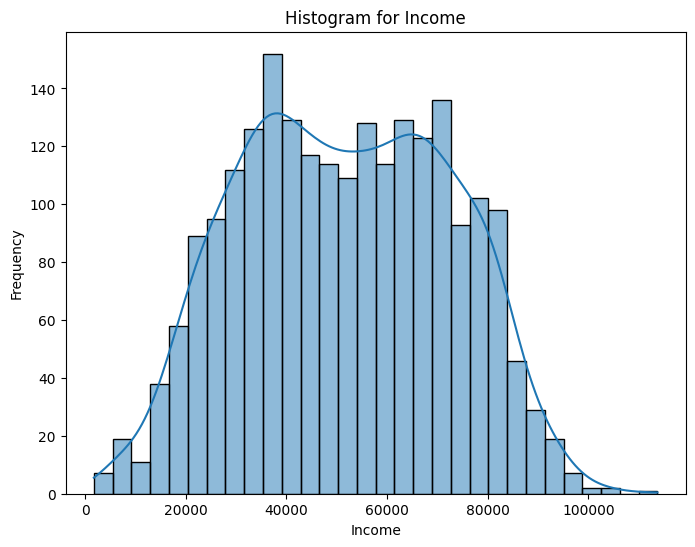

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

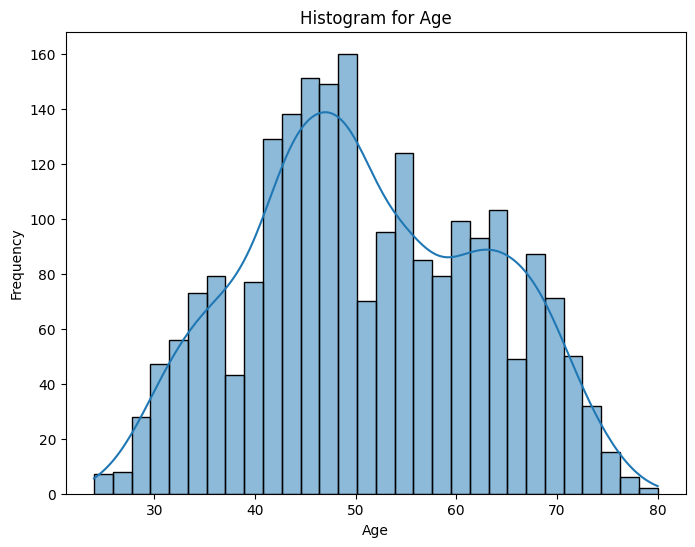

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [4]:
# Dropping unnecessary columns for clustering
columns_to_drop = ['Z_CostContact', 'Z_Revenue']
data.drop(columns=columns_to_drop, inplace=True)

In [6]:
# Step 2: Feature Engineering
# Aggregating total purchase amounts for better segmentation
data['TotalPurchases'] = (
    data['NumDealsPurchases'] + data['NumWebPurchases'] +
    data['NumCatalogPurchases'] + data['NumStorePurchases']
)

In [9]:
# Step 3: Standardization
numerical_features = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'TotalPurchases'
]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_features])

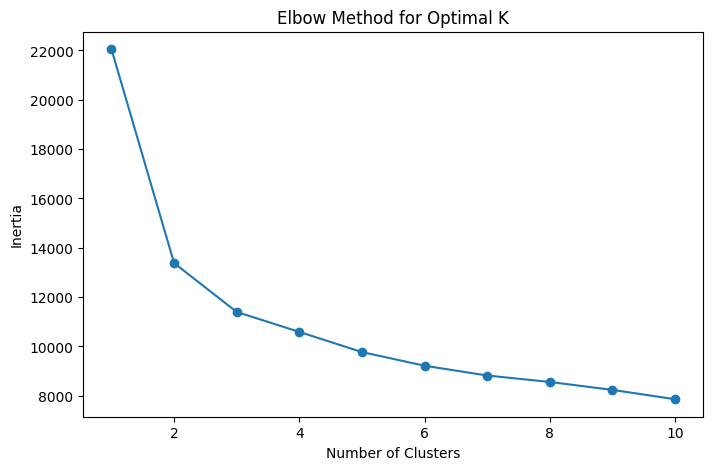

In [10]:
# Step 4: K-means Clustering
# Determining optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
# Applying K-means with optimal K (assume K=4 for this example)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

In [12]:
# Step 5: Principal Component Analysis (PCA) for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

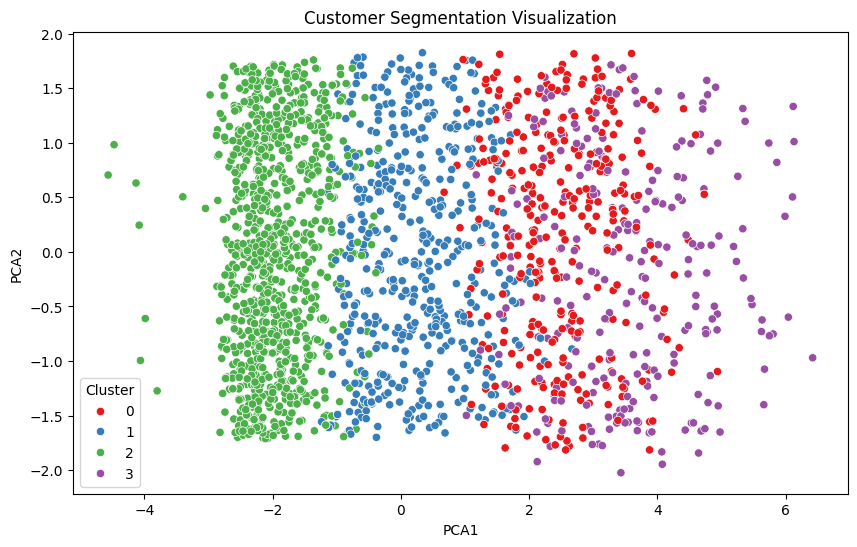

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation Visualization')
plt.show()

In [14]:
# Step 6: Analyze Clusters
# Calculating average metrics for each cluster
cluster_analysis = data.groupby('Cluster')[numerical_features].mean()
print(cluster_analysis)

               Income    Recency    MntWines   MntFruits  MntMeatProducts  \
Cluster                                                                     
0        76118.707182  53.441989  691.049724   41.204420       450.613260   
1        57094.726415  46.056604  449.439623   18.000000       120.328302   
2        34316.937016  49.267442   44.200581    4.736434        22.835271   
3        73297.021352  47.918149  502.188612  102.758007       405.875445   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumWebVisitsMonth  \
Cluster                                                                       
0              76.005525         45.491713     60.182320           2.908840   
1              25.345283         18.652830     61.269811           5.807547   
2               6.838178          4.762597     14.577519           6.512597   
3             125.441281        101.597865     99.085409           3.259786   

         TotalPurchases  
Cluster                  
0         

In [15]:
# Save insights to a CSV
cluster_analysis.to_csv('cluster_insights.csv')

In [16]:
# Step 7: Recommendations
# Adding high-level recommendations (to be expanded further based on analysis)
recommendations = {
    0: 'Focus on high-income, frequent buyers for premium marketing.',
    1: 'Target occasional buyers with discounts and promotions.',
    2: 'Engage younger families with affordable product bundles.',
    3: 'Consider re-engagement strategies for low-frequency buyers.'
}

In [17]:

# Print final recommendations
for cluster, recommendation in recommendations.items():
    print(f"Cluster {cluster}: {recommendation}")


Cluster 0: Focus on high-income, frequent buyers for premium marketing.
Cluster 1: Target occasional buyers with discounts and promotions.
Cluster 2: Engage younger families with affordable product bundles.
Cluster 3: Consider re-engagement strategies for low-frequency buyers.


## ***Thank you***